-----------------------------------------------
# Exercício


Para todos os desafios você precisará consultar a base que foi fornecida no grupo "Trilha de Formação BOT CIA".


In [96]:
#Importando base
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('tpl_hora.xlsx')
df.to_parquet('tpl_hora.parquet')
df = pd.read_parquet('tpl_hora.parquet')
display(df)

,Data,Frota,Unidade,Fazenda,Zona,TalhÃ£o,OperaÃ§Ã£o,Modulo,Desc. MÃ³dulo,Dosagem (L/HA),Ãrea Trabalhada (HA),DuraÃ§Ã£o (Min),Ãrea de SobreposiÃ§Ã£o (HA),Ãrea de Efetiva (HA),Ãrea Total (HA),Unid. Grupo Equip,DuraÃ§Ã£o da AutomaÃ§Ã£o Garfo (Min),Média Consumo Instantaneo,Média RPM
0,28/06/2024,102772,BARRA,90668,536,10,497 - Ap Vinh in Natura Localiz,1,Adubo,"13904,100","0,001","0,067","0,000","0,001","14,080",DIAMANTE - DIA-VN-001,0,"12,000","1031,000"
1,28/06/2024,102772,BARRA,90668,536,10,497 - Ap Vinh in Natura Localiz,1,Adubo,"16042,900","0,007","0,083","0,000","0,007","14,080",DIAMANTE - DIA-VN-001,0,"37,000","1643,000"
2,28/06/2024,102772,BARRA,90668,536,10,497 - Ap Vinh in Natura Localiz,1,Adubo,"16807,800","0,009","0,083","0,000","0,009","14,080",DIAMANTE - DIA-VN-001,0,"41,000","1648,000"
3,28/06/2024,102772,BARRA,90668,536,10,497 - Ap Vinh in Natura Localiz,1,Adubo,"16850,100","0,005","0,033","0,000","0,005","14,080",DIAMANTE - DIA-VN-001,0,"39,000","1659,000"
4,28/06/2024,102772,BARRA,90668,536,10,497 - Ap Vinh in Natura Localiz,1,Adubo,"17392,600","0,011","0,083","0,000","0,011","14,080",DIAMANTE - DIA-VN-001,0,"43,000","1562,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50484,28/06/2024,95217,UNIVALEM,81117,459,5,1005 - Ap Vin Natu Loca c/N c/He,1,Adubo,"42422,400","0,010","0,083","0,000","0,010","26,394",UNIVALEM - UNI-VN-000,0,"0,000","963,000"
50485,28/06/2024,95217,UNIVALEM,81117,459,5,1005 - Ap Vin Natu Loca c/N c/He,1,Adubo,"42525,300","0,009","0,083","0,000","0,009","26,394",UNIVALEM - UNI-VN-000,0,"0,000","1125,000"
50486,28/06/2024,95217,UNIVALEM,81117,459,5,1005 - Ap Vin Natu Loca c/N c/He,1,Adubo,"42912,700","0,010","0,083","0,000","0,010","26,394",UNIVALEM - UNI-VN-000,0,"0,000","1512,000"
50487,28/06/2024,95217,UNIVALEM,81117,459,5,1005 - Ap Vin Natu Loca c/N c/He,1,Adubo,"44420,500","0,009","0,083","0,000","0,009","26,394",UNIVALEM - UNI-VN-000,0,"0,000","1089,000"


In [97]:
#Tratando e filtrando Base
df = df.rename(columns={
    'TalhÃ£o': 'Talhão',
    'OperaÃ§Ã£o': 'Operação',
    'Ãrea Total (HA)': 'Área Total (HA)',
    'Unid. Grupo Equip': 'Frente'})

df['Área Total (HA)'] = df['Área Total (HA)'].astype(str)
df['Área Total (HA)'] = df['Área Total (HA)'].str.replace(',', '.', regex=False)
df['Área Total (HA)'] = pd.to_numeric(df['Área Total (HA)'], errors='coerce')
df['Dosagem (L/HA)'] = df['Dosagem (L/HA)'].astype(str)
df['Dosagem (L/HA)'] = df['Dosagem (L/HA)'].str.replace(',', '.', regex=False)
df['Dosagem (L/HA)'] = pd.to_numeric(df['Dosagem (L/HA)'], errors='coerce')

def replace_nao_definido(row):
    if row['Unidade'] == '*NAO_DEFINIDO*':
        return row['Frente'].split(' - ')[0]
    else:
        return row['Unidade']

df['Unidade'] = df.apply(replace_nao_definido, axis=1)
df497 = df[df['Operação'] == '497 - Ap Vinh in Natura Localiz']

display(df497['Unidade'].unique())
display(df497)

array(['BARRA', 'DIAMANTE', 'VALE DO ROSARIO', 'SERRA'], dtype=object)

,Data,Frota,Unidade,Fazenda,Zona,Talhão,Operação,Modulo,Desc. MÃ³dulo,Dosagem (L/HA),Ãrea Trabalhada (HA),DuraÃ§Ã£o (Min),Ãrea de SobreposiÃ§Ã£o (HA),Ãrea de Efetiva (HA),Área Total (HA),Frente,DuraÃ§Ã£o da AutomaÃ§Ã£o Garfo (Min),Média Consumo Instantaneo,Média RPM
0,28/06/2024,102772,BARRA,90668,536,10,497 - Ap Vinh in Natura Localiz,1,Adubo,13904.1,"0,001","0,067","0,000","0,001",14.08,DIAMANTE - DIA-VN-001,0,"12,000","1031,000"
1,28/06/2024,102772,BARRA,90668,536,10,497 - Ap Vinh in Natura Localiz,1,Adubo,16042.9,"0,007","0,083","0,000","0,007",14.08,DIAMANTE - DIA-VN-001,0,"37,000","1643,000"
2,28/06/2024,102772,BARRA,90668,536,10,497 - Ap Vinh in Natura Localiz,1,Adubo,16807.8,"0,009","0,083","0,000","0,009",14.08,DIAMANTE - DIA-VN-001,0,"41,000","1648,000"
3,28/06/2024,102772,BARRA,90668,536,10,497 - Ap Vinh in Natura Localiz,1,Adubo,16850.1,"0,005","0,033","0,000","0,005",14.08,DIAMANTE - DIA-VN-001,0,"39,000","1659,000"
4,28/06/2024,102772,BARRA,90668,536,10,497 - Ap Vinh in Natura Localiz,1,Adubo,17392.6,"0,011","0,083","0,000","0,011",14.08,DIAMANTE - DIA-VN-001,0,"43,000","1562,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35469,28/06/2024,8014746,VALE DO ROSARIO,18439,1,75,497 - Ap Vinh in Natura Localiz,1,Adubo,37737.4,"0,008","0,083","0,000","0,008",7.20,VALE DO ROSARIO - VRO-VN-002,0,"14,000","887,000"
35470,28/06/2024,8014746,VALE DO ROSARIO,18439,1,75,497 - Ap Vinh in Natura Localiz,1,Adubo,41874.4,"0,005","0,050","0,000","0,005",7.20,VALE DO ROSARIO - VRO-VN-002,0,"9,000","1745,000"
35471,28/06/2024,8014746,VALE DO ROSARIO,18439,1,75,497 - Ap Vinh in Natura Localiz,1,Adubo,45291.2,"0,012","0,083","0,000","0,012",7.20,VALE DO ROSARIO - VRO-VN-002,0,"25,000","1138,000"
35472,28/06/2024,8014746,VALE DO ROSARIO,18439,1,87,497 - Ap Vinh in Natura Localiz,1,Adubo,32686.3,"0,011","0,083","0,000","0,011",5.70,VALE DO ROSARIO - VRO-VN-002,0,"19,000","1748,000"


## Desafio 1

Faça um gráfico de "BARRA" (kind='bar') para todas as frotas da Vinhaça segregadas pela sua frente, e somando o valor total da "Ãrea Total (HA)" por frente, considere somente dados da "OperaÃ§Ã£o = 497".

**O objetivo desse gráfico é:** Demonstrar por frente qual foi a frente mais "produtiva" em "497 - Ap Vinh in Natura Localiz"

**OBS:** Deixe em ordem crescente de acordo com a produtividade (Menor para o maior).

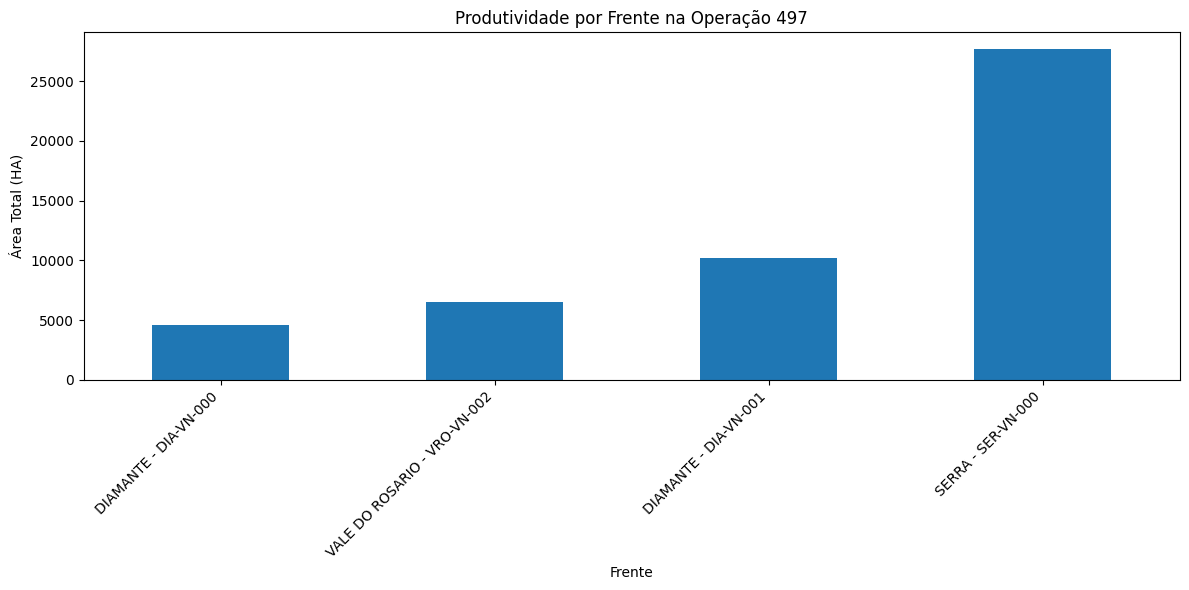

In [98]:
prod_frente = df497.groupby('Frente')['Área Total (HA)'].sum()
prod_frente = prod_frente.sort_values()

plt.figure(figsize=(12, 6))
prod_frente.plot(kind='bar')
plt.title('Produtividade por Frente na Operação 497')
plt.xlabel('Frente')
plt.ylabel('Área Total (HA)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


---


## Desafio 2

Faça um gráfico de "Linha" (kind='line') para todas as frotas da Vinhaça segregadas pela sua Unidade, e somando o valor total da "Ãrea Total (HA)" por Unidade, considere somente dados da "OperaÃ§Ã£o = 497".

**O objetivo desse gráfico é:** Demonstrar por Unidade qual foi a Unidade mais "produtiva" em "497 - Ap Vinh in Natura Localiz"

**OBS:** Deixe em ordem crescente de acordo com a produtividade (Menor para o maior).

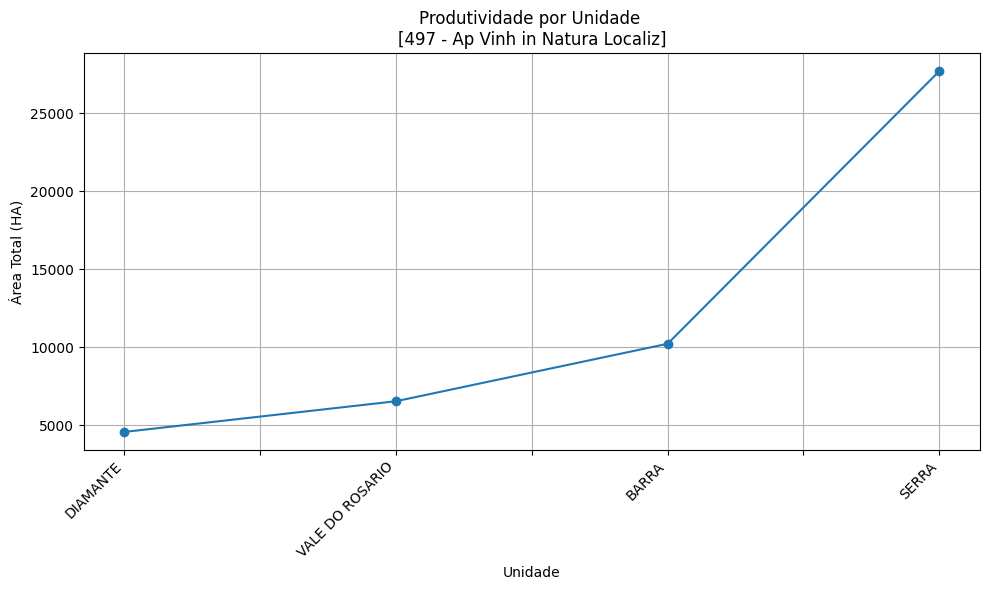

In [99]:
# Agrupar e somar a área total por unidade
prod_unidade = df497.groupby('Unidade')['Área Total (HA)'].sum()
prod_unidade = prod_unidade.sort_values()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
prod_unidade.plot(kind='line', marker='o')
plt.title('''Produtividade por Unidade
[497 - Ap Vinh in Natura Localiz]''')
plt.xlabel('Unidade')
plt.ylabel('Área Total (HA)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()



---


## Desafio 3

A seguir você tem um gráfico de referência "Gráfico de Referência", você deve modificar o código desse gráfico para que ele conste somente valores de "Dosagem (L/HA)"(eixo x) da operação "497" e também ao invez de mostrar os "módulos" a coluna/eixo Y ele deve mostrar as frentes.

**O objetivo desse gráfico é:** Demonstrar por frente qual foi a frente com maior "dispersão" na "Dosagem (L/HA)".

**OBS:** Deixe em ordem crescente de acordo com a produtividade (Menor para o maior).

<ipython-input-100-813e00d90e09>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df497, x='Dosagem (L/HA)', y='Frente', inner='box', palette='Dark2')


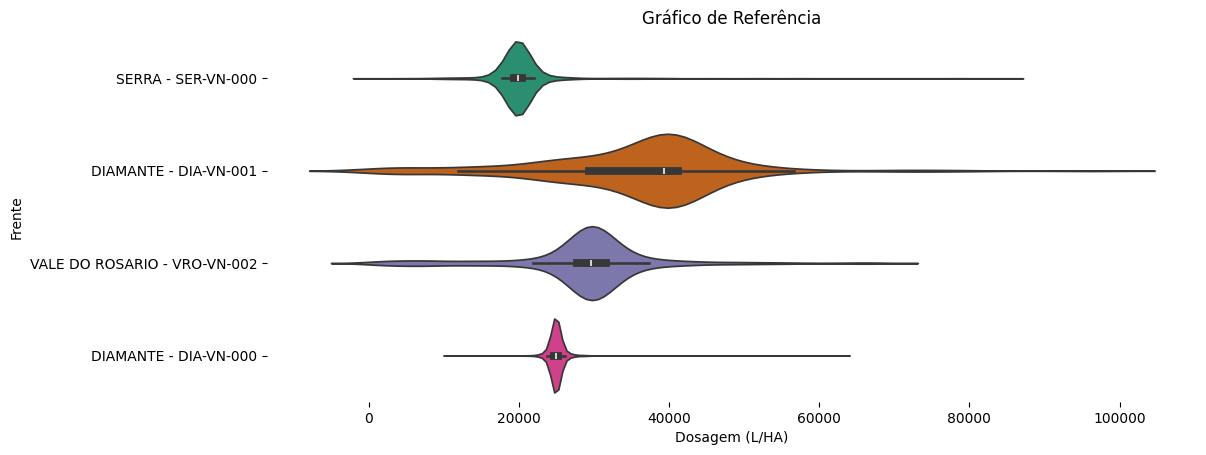

In [100]:
from matplotlib import pyplot as plt
import seaborn as sns
disp = df497.groupby('Frente')['Dosagem (L/HA)'].std().reset_index()
disp = disp.rename(columns={'Dosagem (L/HA)': 'Dispersão'})
disp = disp.sort_values(by='Dispersão')

figsize = (12, 1.2 * len(disp))
plt.figure(figsize=figsize)
sns.violinplot(df497, x='Dosagem (L/HA)', y='Frente', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Gráfico de Referência')
plt.yticks(ticks=range(len(disp)), labels=disp['Frente'].values)
plt.xlabel('Dosagem (L/HA)')
plt.ylabel('Frente')

plt.show()

<br>
<br>

-----------------------------------

**Boa sorte**

"Se algo é importante o suficiente, você deve tentar. Mesmo se o resultado provável for o fracasso." — Elon Musk.